In [51]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import time

plt.rcParams.update({'font.size': 18})

In [52]:
# h5_file = "20250122-070814_pluto_3state.h5"
# h5_file = "20250122-072623_pluto_3state.h5"
# h5_file = "20250122-072940_pluto_3state.h5"
# h5_file = "20250122-073239_pluto_3state.h5" #Looks OK with battery
# h5_file = "20250122-073627_pluto_3state.h5" #With power supply
# h5_file = "20250122-074325_pluto_3state.h5" #With supply and ferrites, looks slightly better
h5_file = "20250122-080748_pluto_3state.h5"

Reading 20250122-080748_pluto_3state.h5
1737504479.539012


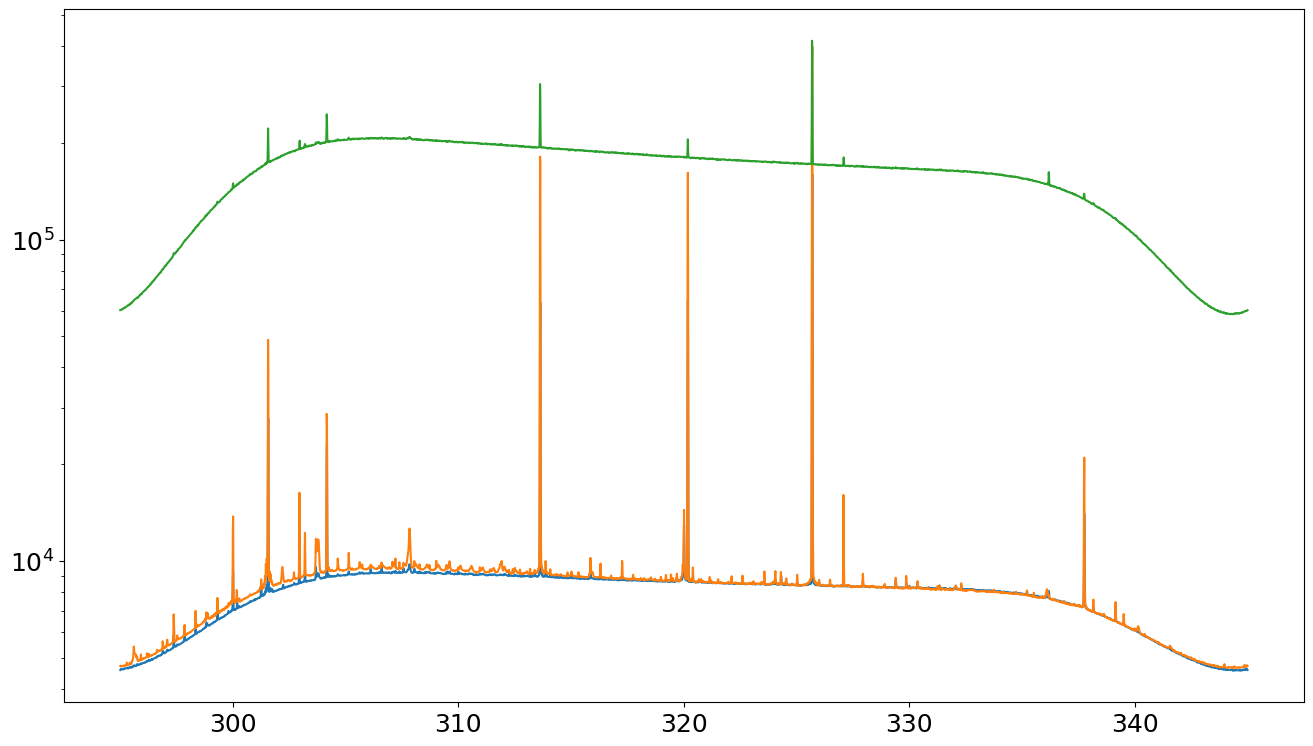

In [53]:
print ("Reading",h5_file)
hf = h5py.File(h5_file, 'r')

NFFT = hf["data"].attrs['NFFT']
fc = hf["data"].attrs['fc']
fs = hf["data"].attrs['fs']
gain = hf["data"].attrs['gain']

freq = np.linspace(fc-(fs/2), fc+(fs/2), NFFT)/1e6

len_data = hf["data/timestamps"][()].shape[0]
len_cal_data = int(len_data/3)-1

ant_index  = np.where(hf["data/obssource"][()]==0)[0][0:len_cal_data]
cold_index = np.where(hf["data/obssource"][()]==1)[0][0:len_cal_data]
hot_index  = np.where(hf["data/obssource"][()]==2)[0][0:len_cal_data]

ant_data = hf["data/radio"][()][ant_index, :]
cold_data = hf["data/radio"][()][cold_index, :]
hot_data = hf["data/radio"][()][hot_index, :]
temperature = hf["data/temperature"][()][ant_index]

ant_tstamps = hf["data/timestamps"][()][ant_index]
print (ant_tstamps[0])
ant_tstamps = ant_tstamps - ant_tstamps[0]

hf.close()

plt.figure(figsize=(16,9))
plt.semilogy(freq, np.mean(ant_data, axis=0))
plt.semilogy(freq, np.mean(cold_data, axis=0))
plt.semilogy(freq, np.mean(hot_data, axis=0))

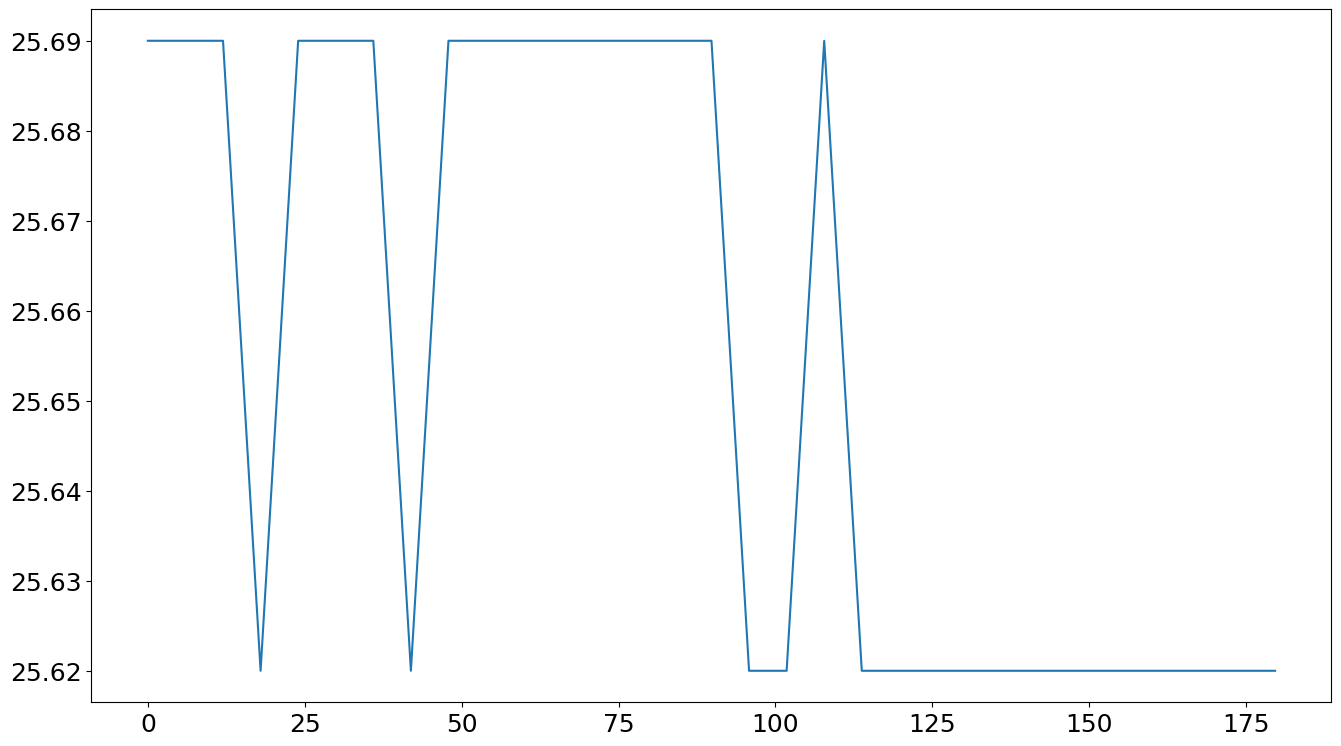

In [54]:
plt.figure(figsize=(16,9))
plt.plot(ant_tstamps, temperature)


In [55]:
ant_calibrated = ant_data/(hot_data - cold_data)
cold_calibrated = cold_data/(hot_data - cold_data)
hot_calibrated = hot_data/(hot_data - cold_data)

mean_ant_power = np.mean(ant_calibrated, axis=1)
mean_cold_power = np.mean(cold_calibrated, axis=1)
mean_hot_power = np.mean(hot_calibrated, axis=1)

mean_ant_spectrum = np.mean(ant_calibrated, axis=0)
mean_cold_spectrum = np.mean(cold_calibrated, axis=0)
mean_hot_spectrum = np.mean(hot_calibrated, axis=0)

(0.0, 10000.0)

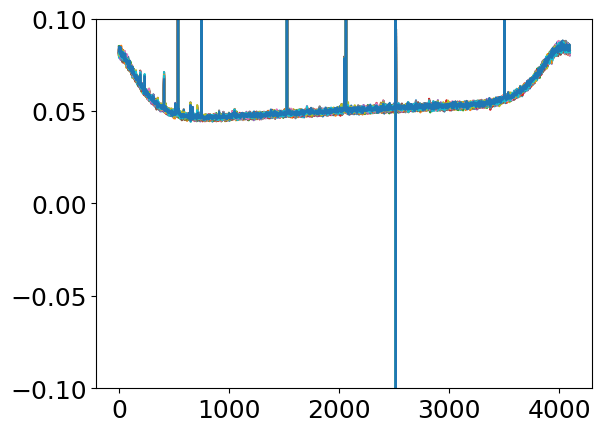

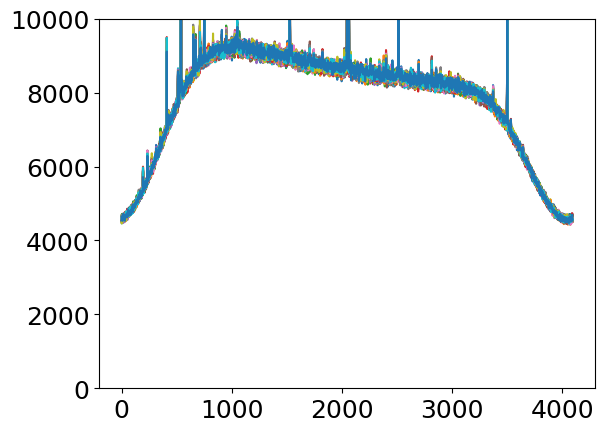

In [56]:
plt.figure()
plt.plot(ant_calibrated.T)
plt.ylim(-0.1, 0.1)

plt.figure()
plt.plot(ant_data.T)
plt.ylim(0, 10000)

# plt.plot(mean_cold_power)
# plt.plot(mean_hot_power)

(-0.01, 0.01)

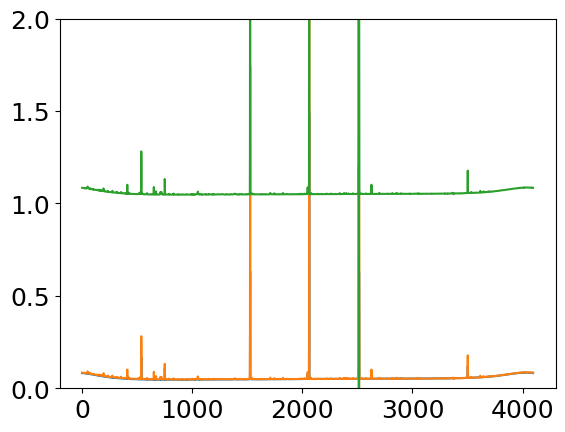

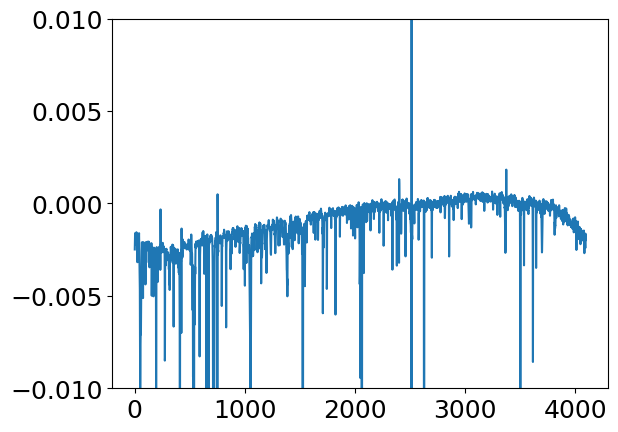

In [57]:
plt.figure()
plt.plot(mean_ant_spectrum)
plt.plot(mean_cold_spectrum)
plt.plot(mean_hot_spectrum)
plt.ylim(0, 2)

plt.figure()
plt.plot(np.mean(ant_calibrated-cold_calibrated, axis=0))
plt.ylim(-0.01, 0.01)


In [58]:
# t_array = []
# rms_array = []
# for i in range(1, len_cal_data):
#     mean_ant_spectrum = np.mean(ant_calibrated[0:i], axis=0)
#     mean_cold_spectrum = np.mean(cold_calibrated[0:i], axis=0)

#     ant_rms = np.std(mean_ant_spectrum-mean_cold_spectrum)
#     # ant_rms = np.std(mean_ant_spectrum)
#     # ant_rms = np.std(mean_cold_spectrum)

#     rms_array = np.append(rms_array, ant_rms)
#     t_array = np.append(t_array, ant_tstamps[i])

# plt.figure(figsize=(16,9))
# plt.loglog(t_array, rms_array)